# Section 5: Matrix Operations for Machine Learning

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## 43. Singular Value Decomposition
As on slides, SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [2]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [3]:
U, d, VT = np.linalg.svd(A)
print("U: ",U, U.shape)
D = np.diag(d)
print(d, d.shape)
print("D: ",D, D.shape)
print("VT: ", VT, VT.shape)

U:  [[ 0.12708324  0.47409506  0.87125411]
 [ 0.00164602 -0.87847553  0.47778451]
 [ 0.99189069 -0.0592843  -0.11241989]] (3, 3)
[8.66918448 4.10429538] (2,)
D:  [[8.66918448 0.        ]
 [0.         4.10429538]] (2, 2)
VT:  [[ 0.55798885  0.82984845]
 [-0.82984845  0.55798885]] (2, 2)


In [4]:
# Convert D dimensions to be possible to multiply
D = np.concatenate((D, [[0,0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [5]:
U @ D @ VT

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [6]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [7]:
U,d, VT = torch.linalg.svd(P)

In [8]:
# (1)
print("Left singular vector U:\n",U)
lambdas, V = torch.linalg.eig(P@P.T)
print("Eigenvectors of P.PT: \n",V.float())

Left singular vector U:
 tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])
Eigenvectors of P.PT: 
 tensor([[-0.9757, -0.1823,  0.1214],
        [-0.0975, -0.1350, -0.9860],
        [-0.1961,  0.9739, -0.1140]])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20792\3517597364.py:4: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Copy.cpp:308.)
  print("Eigenvectors of P.PT: \n",V.float())


In [9]:
# (2)
print("Right singular vector VT:\n",VT)
lambdas, V = torch.linalg.eig(P.T @ P)
print("Eigenvectors of PT.P: \n",V.float())

Right singular vector VT:
 tensor([[-0.9810, -0.1196,  0.1528],
        [-0.0113,  0.8211,  0.5706],
        [ 0.1937, -0.5581,  0.8069]])
Eigenvectors of PT.P: 
 tensor([[ 0.9810,  0.1937, -0.0113],
        [ 0.1196, -0.5581,  0.8211],
        [-0.1528,  0.8069,  0.5706]])


## 44. Data Compression with SVD

In [10]:
from PIL import Image
import requests
from io import BytesIO

In [11]:
image_url = "https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg"
local_filename = "oboe-with-book.jpg" # Optional: you can still save it locally if needed

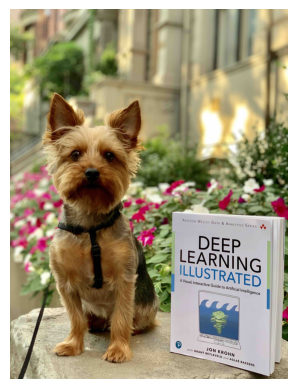

In [12]:
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
# Display the image
_ = plt.imshow(img)
plt.axis('off')
plt.show()

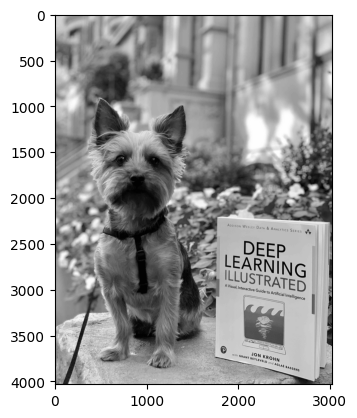

In [13]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

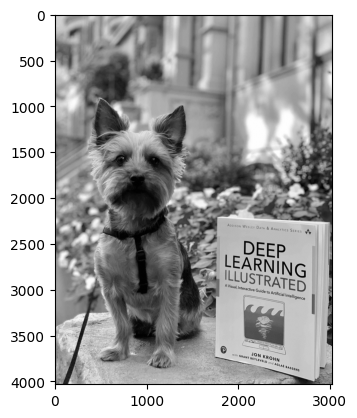

In [14]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [15]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

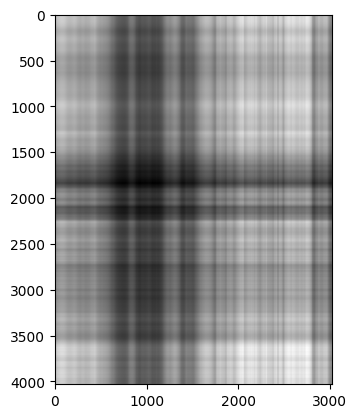

In [16]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

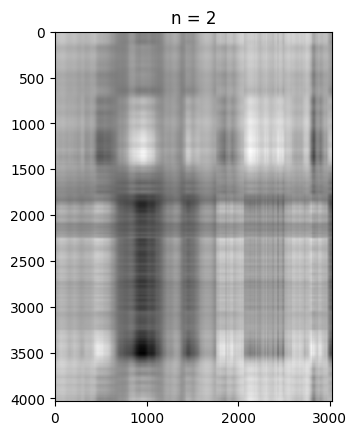

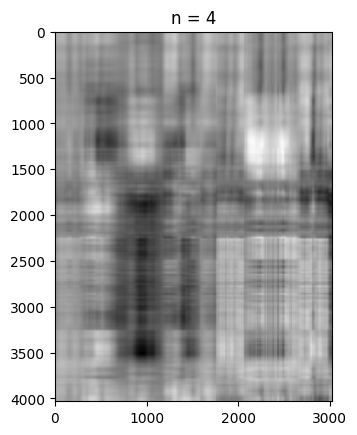

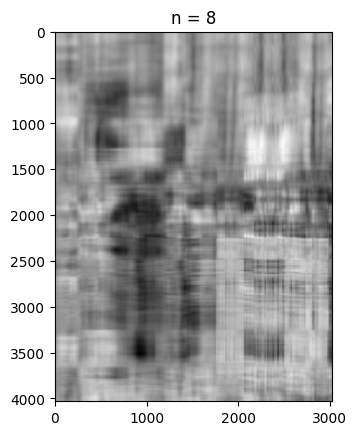

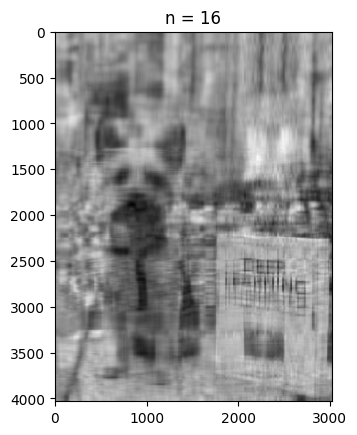

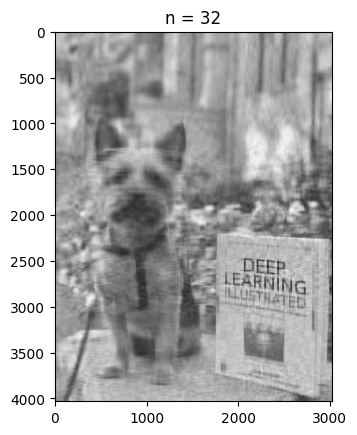

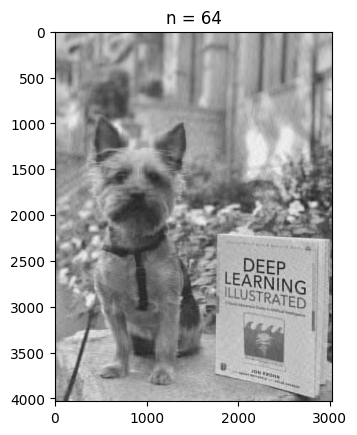

In [17]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [18]:
import numpy as np

# Create a simple matrix
A = np.array([[3, 2, 2],
              [2, 3, -2]])

# # Perform SVD
U, S, VT = np.linalg.svd(A)

print("U matrix:\n", U)
print("Singular values:\n", S)
print("V transpose:\n", VT)

# Reconstruct A using SVD
S_matrix = np.zeros((2, 3))
S_matrix[:2, :2] = np.diag(S)
print("S matrix:\n", S_matrix)

A_reconstructed = U @ S_matrix @ VT
print("Reconstructed A:\n", A_reconstructed)

U matrix:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Singular values:
 [5. 3.]
V transpose:
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
S matrix:
 [[5. 0. 0.]
 [0. 3. 0.]]
Reconstructed A:
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [19]:
# Use case: Dimensionality reduction
k = 1  # keep only top singular value
U_k = U[:,:k] # (m x k)
S_k = np.diag(S[:k]) # k x k
VT_k = VT[:k,:] # (k x n)
print("U_k:\n", U_k)
print("S_k:\n", S_k)
print("VT_k:\n", VT_k)
A = U_k @ S_k @ VT_k
print("A:\n", A)


U_k:
 [[-0.70710678]
 [-0.70710678]]
S_k:
 [[5.]]
VT_k:
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]]
A:
 [[2.50000000e+00 2.50000000e+00 2.29078674e-16]
 [2.50000000e+00 2.50000000e+00 2.29078674e-16]]


In [20]:
# Testing on k = 2, the result is expected to be the same
# Use case: Dimensionality reduction
k = 2
U_k = U[:,:k] # (m x k)
S_k = np.diag(S[:k]) # k x k
VT_k = VT[:k,:] # (k x n)
print("U_k:\n", U_k)
print("S_k:\n", S_k)
print("VT_k:\n", VT_k)
A = U_k @ S_k @ VT_k
print("A:\n", A)

U_k:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S_k:
 [[5. 0.]
 [0. 3.]]
VT_k:
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]]
A:
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


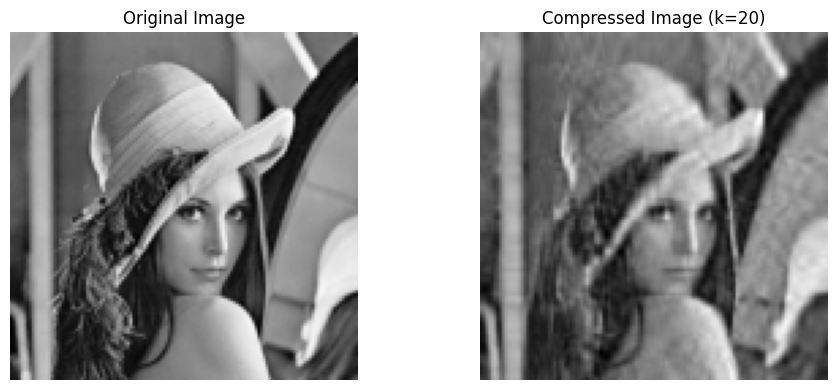

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.transform import resize

# 1. Load and preprocess the image
image = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
gray_image = color.rgb2gray(image)  # Convert to grayscale
gray_image = resize(gray_image, (128, 128))  # Resize for speed

# 2. Apply SVD
U, S, VT = np.linalg.svd(gray_image, full_matrices=False)

# 3. Reconstruct using top k components
k = 20  # Try with 5, 20, 50, etc.
S_k = np.diag(S[:k])
U_k = U[:, :k]
VT_k = VT[:k, :]
compressed_image = U_k @ S_k @ VT_k

# 4. Plot the original and compressed image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image (k={k})')
plt.axis('off')

plt.tight_layout()
plt.show()


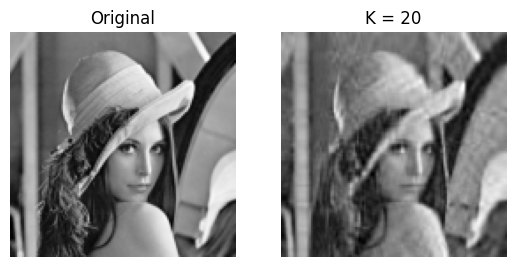

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.transform import resize

# Load image
image = io.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
gray_image = color.rgb2gray(image)
gray_image = resize(gray_image, (128,128))

# Apply SVD
U, S, VT = np.linalg.svd(gray_image,full_matrices=False)

# Reconstruct using top k components
k = 20 # 50, 100, ...
U_k = U[:,:k]
S_k = np.diag(S[:k])
VT_k = VT[:k,:]
compressed_image = U_k @ S_k @ VT_k

# Plot
# plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title(f"Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f"K = {k}")
plt.axis('off')

plt.show()

In [23]:
print(f"Compression ratio: {100 * k * (1 + gray_image.shape[0] + gray_image.shape[1]) / (gray_image.size):.2f}%")

Compression ratio: 31.37%


## 45. The Moore-Penrose Pseudoinverse
$A^+ = VD^+U^T$

In [24]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [25]:
U, d, VT = np.linalg.svd(A)

In [26]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [27]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible: 

In [34]:
Dplus = np.concatenate((Dinv, np.array([[0,0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [36]:
V = VT.T
Aplus = V @ Dplus @ U.T
Aplus

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [37]:
# Numpy has the method
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

**Exercise** 

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`: 

In [6]:
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [40]:
U, d, VT = torch.linalg.svd(A_p)

In [43]:
Dinv = torch.linalg.inv(torch.diag(d))
Dinv

tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])

In [45]:
Dplus = torch.concatenate((Dinv, torch.tensor([[0,0]]).T),axis=1)
Dplus

tensor([[0.1154, 0.0000, 0.0000],
        [0.0000, 0.2436, 0.0000]])

In [46]:
Aplus = VT.T @ Dplus @ U.T
Aplus

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [48]:
# torch's pseudoinverse
torch.linalg.pinv(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [49]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

## 46. Regression with the Pseudoinverse

In [2]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

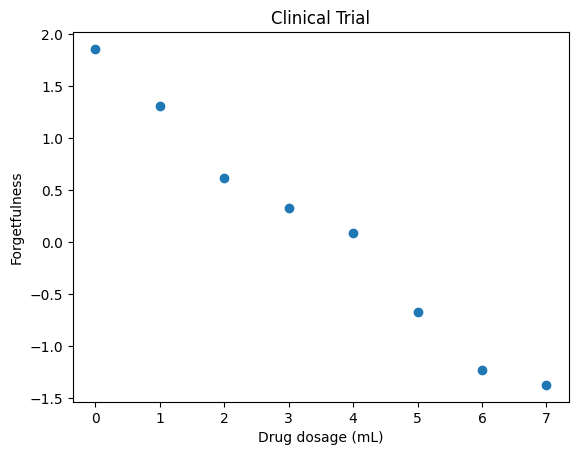

In [3]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Linear regression needs an intercept term (bias), so we add a second feature $x_0 = 1$

In [4]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [5]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

Compute weights using pseudoinverse
$w = X^+y$

In [6]:
Xplus = np.linalg.pinv(X)
w = np.dot(Xplus, y)
w

matrix([[ 1.76      , -0.46928571]])

In [15]:
# intercept, slope
b, m = np.asarray(w).reshape(-1)
b, m

(1.7599999999999985, -0.4692857142857139)

With the weights we can plot the line to confirm it fits the points ($\hat{y} = m \cdot x + b$):

-0.35000000000000003 7.35


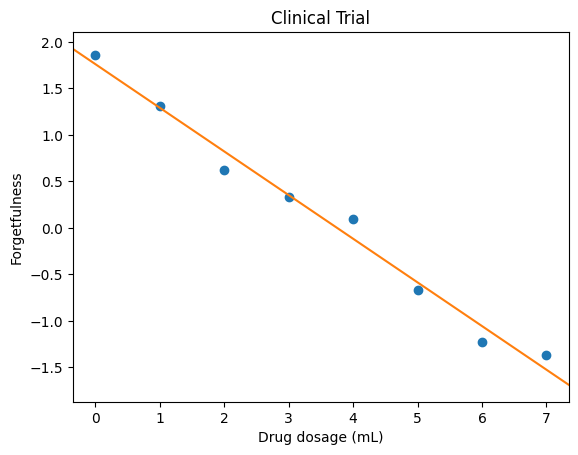

In [16]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)
x_min, x_max = ax.get_xlim()
print(x_min,x_max)
y_at_xmin = m * x_min + b
y_at_xmax = m * x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

## 47. Trace Operator

In [2]:
A = np.array([[25, 2], [5, 4]])
np.trace(A)

29

The trace operator has a number of useful properties that come in handy while rearranging linear algebra equations, e.g.:

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

In [3]:
np.trace(A.T)

29

In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

In [4]:
np.linalg.norm(A) == np.sqrt(np.trace(A@A.T))

True

**Exercises**

With the matrix `A_p` provided below: 

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$

In [8]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [7]:
# 1
torch.trace(A_p)

tensor(-3.)

In [10]:
# 2
torch.linalg.norm(A_p) == torch.sqrt(torch.trace(A_p@A_p.T))

tensor(True)

## 48. PCA

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
iris.data.shape

(150, 4)

In [13]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.data[:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [19]:
from sklearn.decomposition import PCA

In [ ]:
# 2: compress 4 features to 2 (to plot)
pca = PCA(n_components=2)

In [21]:
X = pca.fit_transform(iris.data)

In [23]:
X.shape

(150, 2)

In [24]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

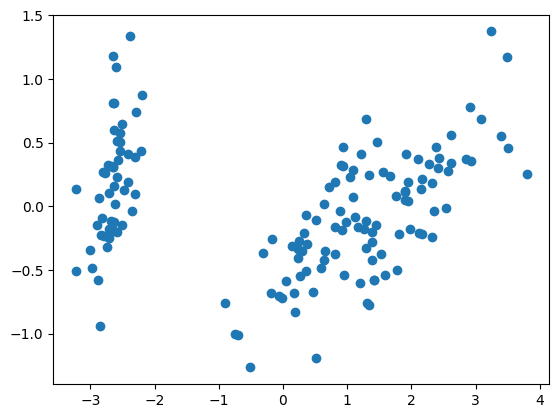

In [25]:
_ = plt.scatter(X[:,0],X[:,1])

In [26]:
iris.target.shape

(150,)

In [27]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [28]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]], dtype=int64)

In [29]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

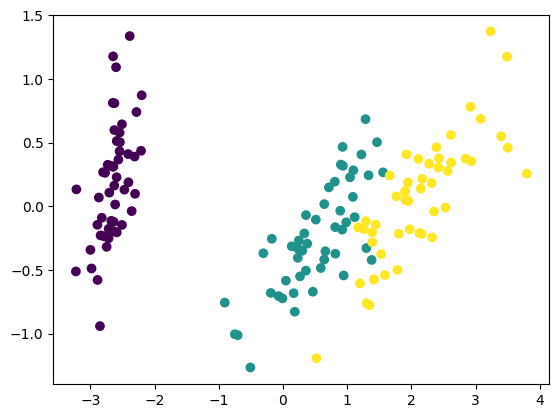

In [30]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

So the PCA technique was effective for identifying hidden structure underlying our four pieces of flower